In [8]:
%matplotlib inline
from __future__ import division
import serial
from collections import defaultdict
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import pylab
import pandas as pd
import xlsxwriter
import math
import collections

pylab.rcParams['figure.figsize'] = (10.0, 10.0)

/Users/legion/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [35]:
angles = list()
pressures = list()
with open("/Users/legion/Dropbox/Chomp/2016-04-10_21-37-10_swing1.txt") as fh:
    for line in fh.readlines()[:-3]:
        if line[0] == "timestep":
            timestep = int(line[1])
            print "\t".join(line)
        else:
            line = line.rstrip().split("\t")
            angle, pressure = map(int, line)
            angles.append(angle)
            pressures.append(pressure)

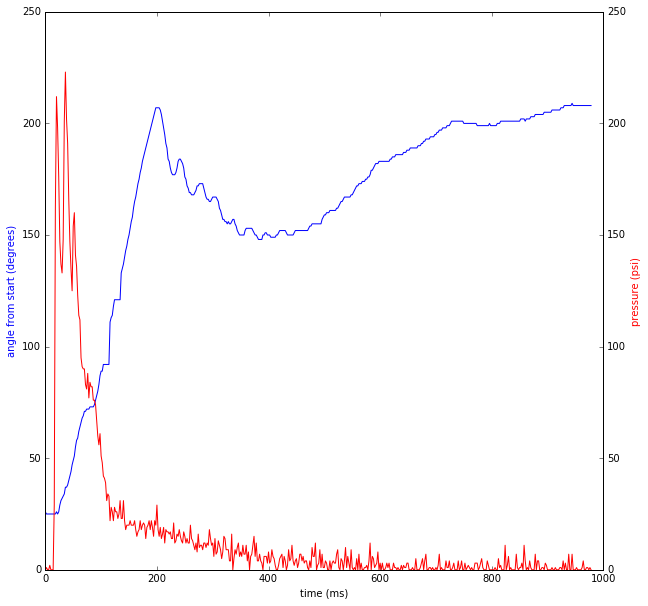

In [36]:
angles = np.array(angles)
pressures = np.array(pressures)
timestep = 2000
graph_timestep = timestep / 1000  # convert to ms
x = np.arange(0, len(angles) * graph_timestep, graph_timestep)
fig = plt.figure()
ax1 = plt.gca()
ax1.plot(x, angles)
plt.ylabel("angle from start (degrees)", color="blue")
plt.xlabel("time (ms)")
# ax1 = plt.gca()
ax2 = ax1.twinx()
ax2.plot(x, pressures, color="red")
plt.ylabel("pressure (psi)", color="red")

In [37]:
def polyfit_derivative(data, num_points, timestep):
    poly_derivatives = list()
    for i in range(len(data) - num_points):
        x = sum(range(num_points)) / num_points
        polyfit = np.polyfit(range(num_points), data[i:i + num_points], 2)
        first_derivative = 2 * polyfit[0] * x + polyfit[1]
        poly_derivatives.append(first_derivative * (1000000 / timestep))
    return np.array(poly_derivatives)

(0.0, 250.0)

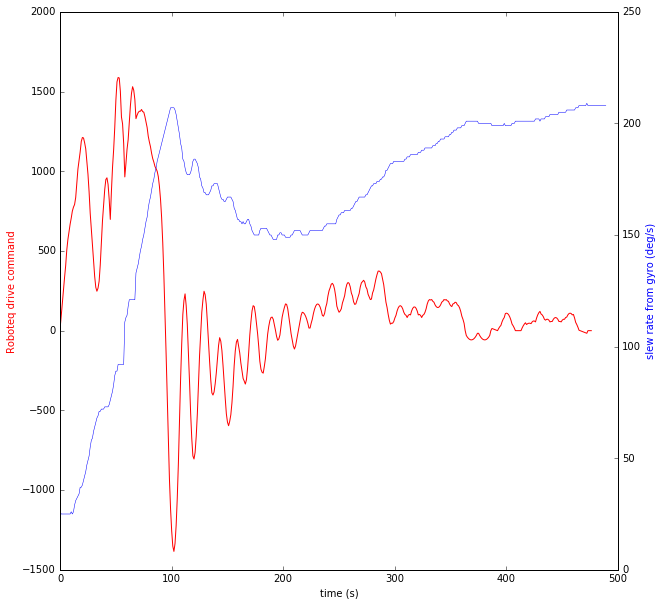

In [38]:
plt.plot(polyfit_derivative(angles, 13, timestep), color="red")
plt.xlabel("time (s)")
plt.ylabel("Roboteq drive command", color="red")
ax1 = plt.gca()
ax2 = ax1.twinx()
ax2.plot(angles, linewidth=0.5)
plt.ylabel("slew rate from gyro (deg/s)", color="blue")
ymin1, ymax1 = ax1.get_ylim()
ymin2, ymax2 = ax2.get_ylim()
ymin = min(ymin1, ymin2)
ymax = max(10, ymax1, ymax2)
ax1.set_ylim(ymin1, ymax1)
ax2.set_ylim(ymin2, ymax2)

# plt.plot(polyfit_derivative(angles, 13, 2000))

In [48]:
for points in range(5, 36, 2):
    print (polyfit_derivative(angles, points, timestep).max() / 360 * 1.07 * 2 * np.pi) ** 2 * 3.4 / 2

6262.35861428
3866.04792004
2761.90189483
1999.34886515
1494.9412359
1321.31909977
1290.75515519
1266.22680632
1235.40312525
1204.59714794
1170.37183087
1135.6551046
1119.52002843
1118.95370187
1114.39548948
1107.606318


In [40]:
angular_velocities = polyfit_derivative(angles, 13, 2000)
max_v = angular_velocities.max() / 360 * 1.07 * 2 * np.pi
ke = max_v ** 2 * 3.4 / 2   # 3.4 kg, 1.07 m radius arc
print ke

1494.9412359
